# Multi-stage cyclic symmetry example {#ref_multi_stage_cyclic}

This example shows how to expand the mesh and results from a multi-stage
cyclic analysis.


In [1]:
from ansys.dpf import core as dpf
from ansys.dpf.core import examples

Create the model and display the state of the result.


In [2]:
cyc = examples.download_multi_stage_cyclic_result()
model = dpf.Model(cyc)
print(model)

DPF Model
------------------------------
Modal analysis
Unit system: MKS: m, kg, N, s, V, A, degC
Physics Type: Mechanical
Available results:
     -  displacement: Nodal Displacement
     -  stress: ElementalNodal Stress 
     -  elastic_strain: ElementalNodal Strain
     -  structural_temperature: ElementalNodal Temperature
------------------------------
DPF  Meshed Region: 
  3595 nodes 
  1557 elements 
  Unit: m 
  With solid (3D) elements
------------------------------
DPF  Time/Freq Support: 
  Number of sets: 6 
Cumulative     Frequency (Hz) LoadStep       Substep        Harmonic index  
1              188.385357     1              1              0.000000        
2              325.126418     1              2              0.000000        
3              595.320548     1              3              0.000000        
4              638.189511     1              4              0.000000        
5              775.669703     1              5              0.000000        
6            

# Expand displacement results

This example expands displacement results, by default on all nodes and
the first time step. Note that the displacements are expanded using the
`read_cyclic
<ansys.dpf.core.operators.mesh.mesh_provider.InputsMeshProvider.read_cyclic>`{.interpreted-text
role="func"} property with 2 as an argument (1 would ignore the cyclic
symmetry).


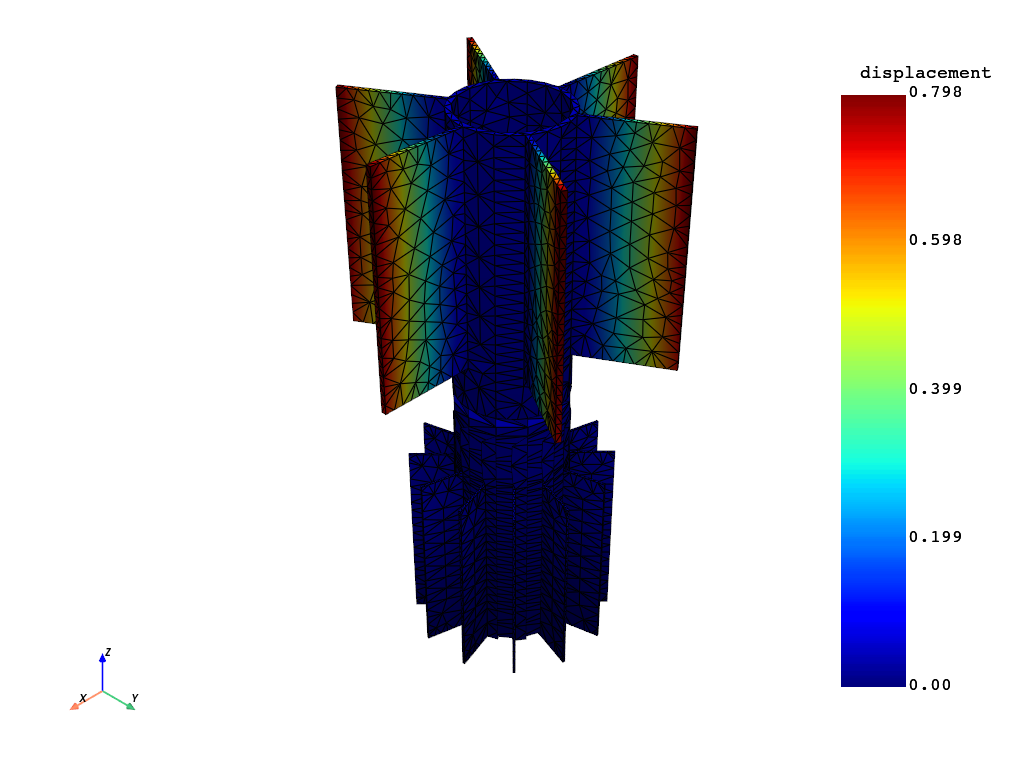

In [3]:
# Create displacement cyclic operator
u_cyc = model.results.displacement()
u_cyc.inputs.read_cyclic(2)

# expand the displacements and get a total deformation
nrm = dpf.operators.math.norm_fc()
nrm.inputs.connect(u_cyc.outputs)
fields = nrm.outputs.fields_container()

# # get the expanded mesh
mesh_provider = model.metadata.mesh_provider
mesh_provider.inputs.read_cyclic(2)
mesh = mesh_provider.outputs.mesh()

# # plot the expanded result on the expanded mesh
mesh.plot(fields)

# Expand stresses at a given time step


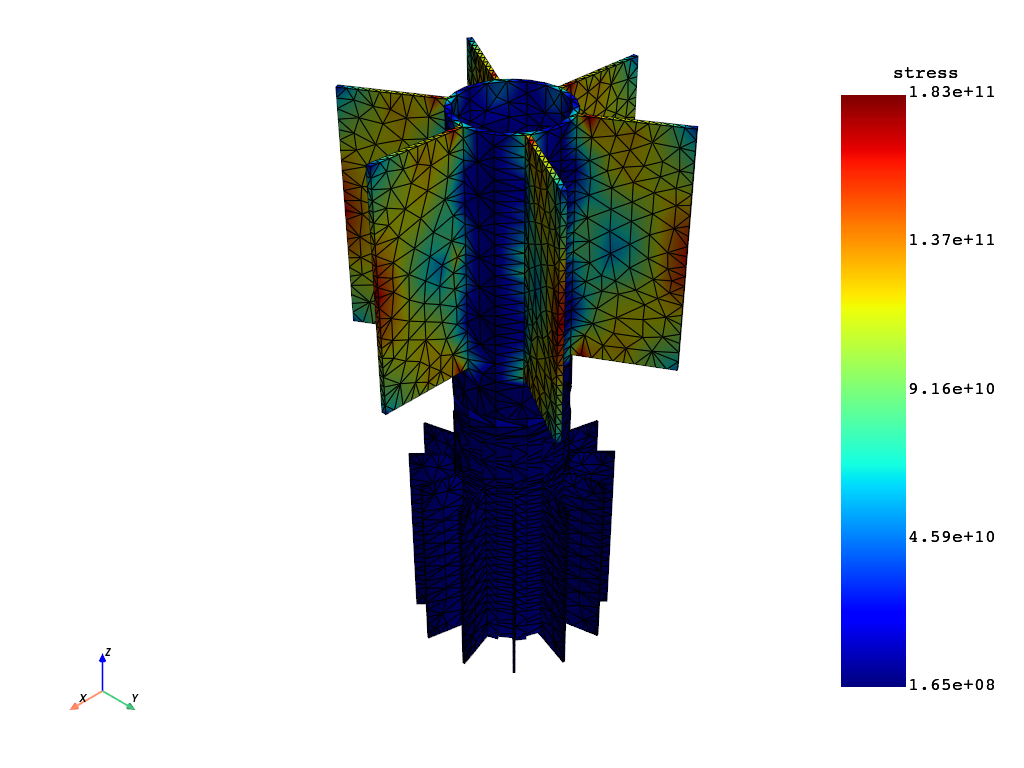

In [4]:
# define stress expansion operator and request stresses at time set = 3
s_cyc = model.results.stress()
s_cyc.inputs.read_cyclic(2)
s_cyc.inputs.time_scoping.connect([3])

# request the results averaged on the nodes
s_cyc.inputs.requested_location.connect(dpf.locations.nodal)

# request equivalent von mises operator and connect it to stress
# operator
eqv = dpf.operators.invariant.von_mises_eqv_fc(s_cyc)

# expand the results and get stress eqv
fields = eqv.outputs.fields_container()

# plot the expanded result on the expanded mesh
mesh.plot(fields)